In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import LeeExperimentToolkit as lee
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

use breast cancer dataset to do the experiment

In [3]:
X, y = load_breast_cancer(return_X_y=True,as_frame=True)

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

In [6]:
len(X.columns)#number of features

30

In [7]:
2**30 #number of possible subsets of features

1073741824

we first do a sampling to see how different features would possibly influnce the model performance

In [8]:
X_featureset, y_classset = lee.PerformanceHandler.Sampling_randomd_featuresets(X,y,RandomForestClassifier(),4000,40)

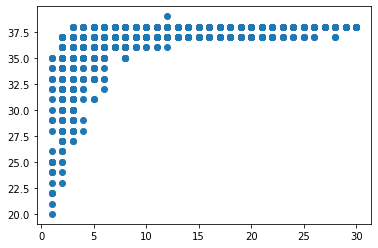

In [9]:
plt.scatter(lee.PerformanceHandler.Sum_feature_amount(X_featureset),y_classset)

let's also use AL to train a model and see what happen

In [11]:
learner = lee.PerformanceHandler.Use_AL_to_train_featureset(X,y,1000,500,4000,40,RandomForestClassifier(),RandomForestClassifier())

Accuracy after query 1: 0.7419
Accuracy after query 2: 0.7358
Accuracy after query 3: 0.7520
Accuracy after query 4: 0.7561
Accuracy after query 5: 0.7581
Accuracy after query 6: 0.7480
Accuracy after query 7: 0.7602
Accuracy after query 8: 0.7520
Accuracy after query 9: 0.7602
Accuracy after query 10: 0.7561
Accuracy after query 11: 0.7480
Accuracy after query 12: 0.7419
Accuracy after query 13: 0.7622
Accuracy after query 14: 0.7703
Accuracy after query 15: 0.7459
Accuracy after query 16: 0.7520
Accuracy after query 17: 0.7622
Accuracy after query 18: 0.7683
Accuracy after query 19: 0.7439
Accuracy after query 20: 0.7439
Accuracy after query 21: 0.7439
Accuracy after query 22: 0.7520
Accuracy after query 23: 0.7541
Accuracy after query 24: 0.7419
Accuracy after query 25: 0.7520
Accuracy after query 26: 0.7398
Accuracy after query 27: 0.7622
Accuracy after query 28: 0.7439
Accuracy after query 29: 0.7480
Accuracy after query 30: 0.7622
Accuracy after query 31: 0.7561
Accuracy after qu

In [13]:
y_prediction = []
for i in range(len(X_featureset)):
    y_prediction.append(learner.predict(np.array([X_featureset.iloc[i,:]])))

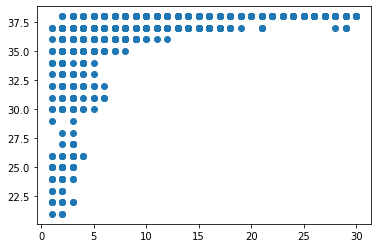

In [14]:
plt.scatter(lee.PerformanceHandler.Sum_feature_amount(X_featureset),y_prediction)